In [1]:
#import necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
#load dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
#define the netword architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
#train model using sgd
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
history=model.fit(x_train,
                  y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6462 - accuracy: 0.8373 - val_loss: 0.3553 - val_accuracy: 0.9033
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.9058 - val_loss: 0.2941 - val_accuracy: 0.9173
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2878 - accuracy: 0.9202 - val_loss: 0.2619 - val_accuracy: 0.9277


313/313 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9277
Loss=0.262
Accuracy=0.928


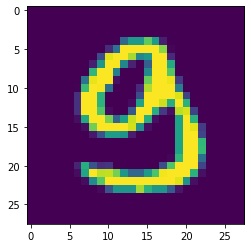

313/313 [==============================] - 0s 1ms/step


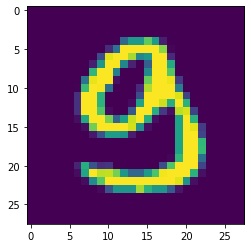

In [6]:
#evaluate network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [7]:
print('Predicted Value:', predicted_value[n])

Predicted Value: [4.5761887e-02 6.1774670e-05 3.0029301e-02 6.1442304e-01 1.0976782e-04
 6.7841843e-02 2.9184435e-05 6.0031185e-04 2.3626852e-01 4.8743142e-03]


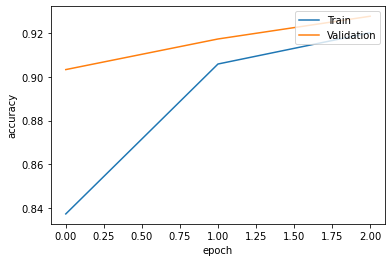

In [10]:
#plotting train accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

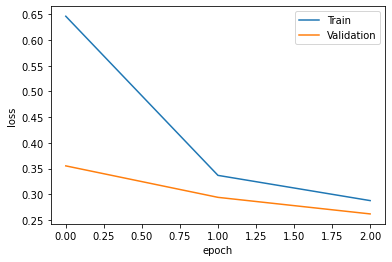

In [11]:
#plotting train loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()